In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, recall_score, classification_report, precision_score
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, roc_auc_score, average_precision_score
from sklearn.metrics import  plot_precision_recall_curve, plot_roc_curve, balanced_accuracy_score, get_scorer
import pydotplus
import collections
from sklearn.tree import export_graphviz
from mlxtend.plotting import plot_confusion_matrix as ml_plot_confusion_matrix
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep= ';')


## Summary of data

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Making new y_1: 1= yes and 0= no
df.loc[df['y']== 'no', 'y_1']= 0
df.loc[df['y']== 'yes', 'y_1']= 1

In [6]:
df.shape

(41188, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_1'],
      dtype='object')

In [9]:
df.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_1
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no,NaN
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548,NaN
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN,0.112654
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN,0.316173
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN,0.000000
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN,0.000000
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN,0.000000
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN,0.000000


In [10]:
# This function will plot a bar plot which shows (Percentage Of People Who Said Yes) due to one variable:
def popwsy_plot(variable, figsize= (4, 4)):
    agg= df.groupby(variable).aggregate([np.mean])
    sorted_agg= agg["y_1", "mean"].values.argsort()
    plt.figure(figsize= figsize)
    plt.bar(range(len(agg)), agg["y_1", "mean"].iloc[sorted_agg])
    plt.xticks(range(len(agg)), agg["y_1", "mean"].index[sorted_agg])
    plt.xlabel('%s'%(variable))
    plt.ylabel("Percentage of people who said yes")
    plt.tight_layout()   
# Same for horizental:
def popwsy_ploth(variable, figsize= (4, 4)):
    agg= df.groupby(variable).aggregate([np.mean])
    sorted_agg= agg["y_1", "mean"].values.argsort()
    plt.figure(figsize= figsize)
    plt.barh(range(len(agg)), agg["y_1", "mean"].iloc[sorted_agg])
    plt.yticks(range(len(agg)), agg["y_1", "mean"].index[sorted_agg])
    plt.ylabel('%s'%(variable))
    plt.xlabel("Percentage of people who said yes")
    plt.tight_layout()


    
# This function will plot frequency of categorical variables:
def freq_plot(variable, figsize= (5, 5)):
    value_counts= df[variable].value_counts()
    plt.figure(figsize= figsize)
    plt.bar(range(len(value_counts)), value_counts)
    plt.xticks(range(len(value_counts)), value_counts.index)
    plt.ylabel('Count')
    plt.xlabel('%s'%(variable))
    plt.tight_layout()
# Same for horizental:
def freq_ploth(variable, figsize= (5, 5)):
    value_counts= df[variable].value_counts()
    plt.figure(figsize= figsize)
    plt.barh(range(len(value_counts)), value_counts)
    plt.yticks(range(len(value_counts)), value_counts.index)
    plt.xlabel('Count')
    plt.ylabel('%s'%(variable))
    plt.tight_layout()
    

## Age variable

In [11]:
df['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

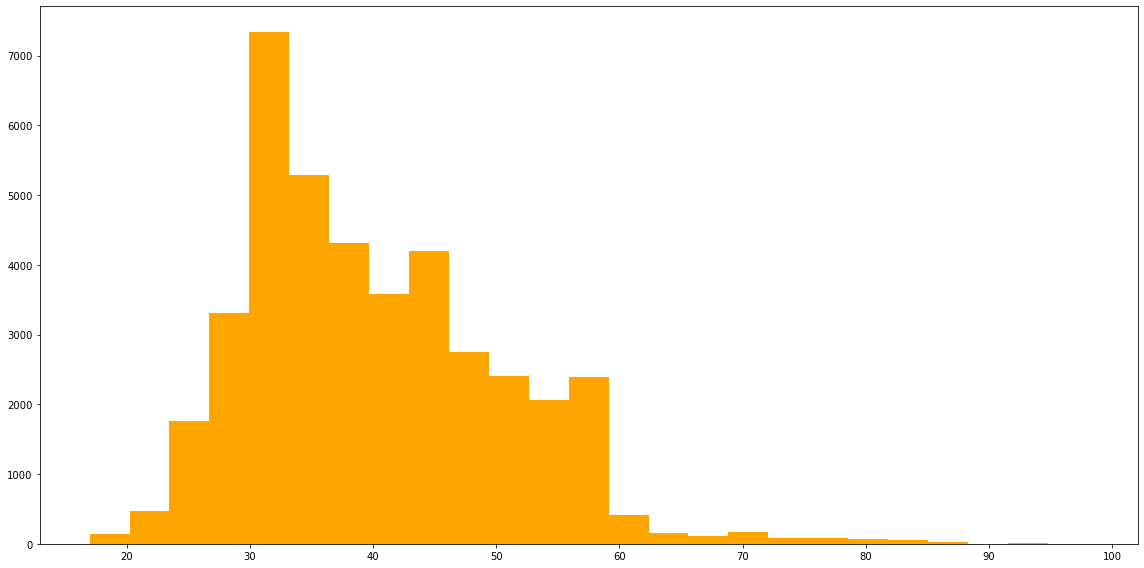

In [12]:
plt.figure(figsize= (16, 8))
plt.hist(df['age'], bins= 25, color= 'orange')
plt.tight_layout()

In [13]:
df['age'].quantile([.25, .5, .75])

0.25    32.0
0.50    38.0
0.75    47.0
Name: age, dtype: float64

In [14]:
df.loc[df['age'] < 32, 'age'] = 25
df.loc[(df['age'] >= 32)&(df.age <= 47),'age'] = 40
df.loc[df['age'] > 47,'age'] = 72
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_1
0,72,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
1,72,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
2,40,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
4,72,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0


In [15]:
df['age'].value_counts()

40    21985
72     9873
25     9330
Name: age, dtype: int64

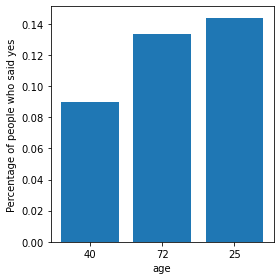

In [16]:
popwsy_plot(variable= 'age')

## Duration variable
#### : last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Job variable
### type of job 

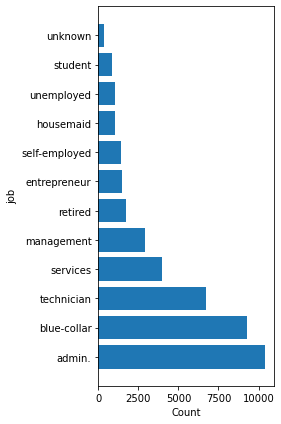

In [17]:
freq_ploth('job', (4, 6))

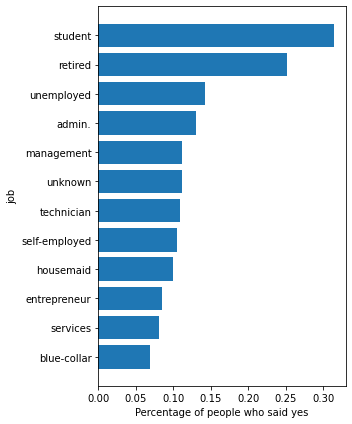

In [18]:
popwsy_ploth('job', (5, 6))

## Martial variable
###  marital status 

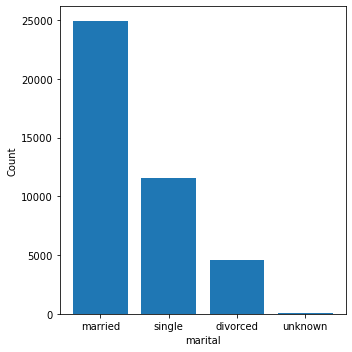

In [19]:
freq_plot('marital')

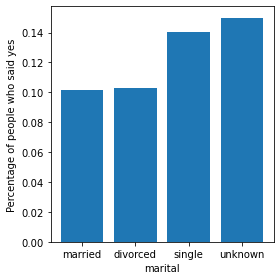

In [20]:
popwsy_plot('marital')

### According to that unknown martial is rare and it behave like single we can put them in one variable together for dimensional reduction

In [21]:
df.loc[df['marital'] == 'unknown','marital'] = 'single'

In [22]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

## Education variable

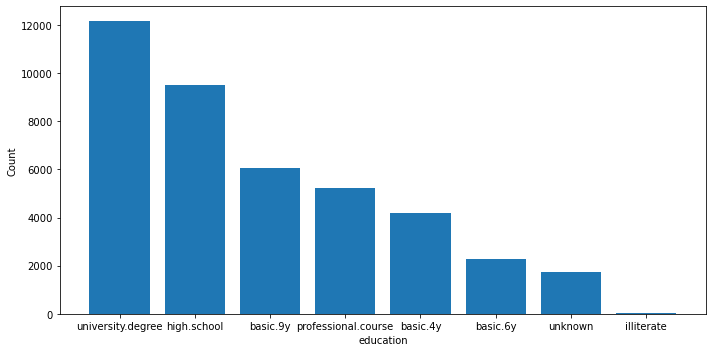

In [23]:
freq_plot('education', (10, 5))

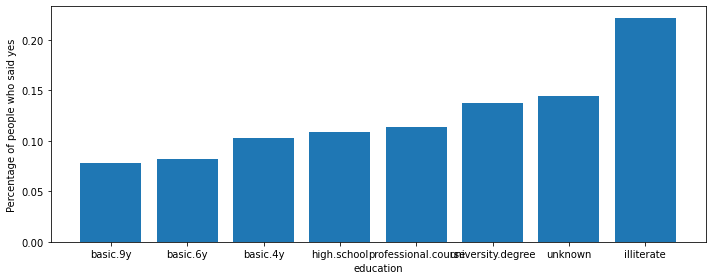

In [24]:
popwsy_plot('education', (10, 4))

## Default variable
### has credit in default?

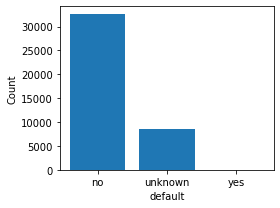

In [25]:
freq_plot('default', (4,3))

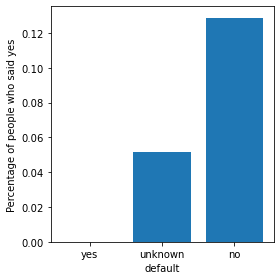

In [26]:
popwsy_plot('default')

In [27]:
## Badan emtehan konam null bedam be unknown ha va simpleimputer bezanam rush

### Because yes in defaul variable is very rare We combine it with unknown for dimension reduction and avoiding over fiting

In [28]:
df.loc[df['default'] == 'unknown', 'default'] = 'unknown-yes'
df.loc[(df['default'] == 'yes'), 'default'] = 'unknown-yes'
df.loc[(df['default'] == 'no'), 'default'] = 'default-no'

## Housing variable
### has housing loan? 

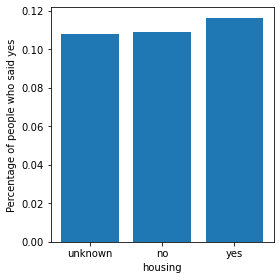

In [29]:
popwsy_plot('housing')

### It seems that this feature is not so much usable
### So maybe later we drope it

## Loan variable
### has personal loan?

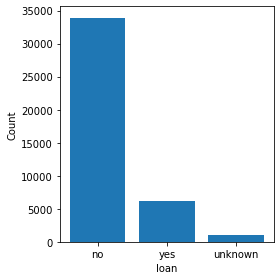

In [30]:
freq_plot('loan', (4, 4))

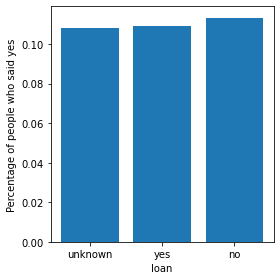

In [31]:
popwsy_plot('loan')

### it seems that loan is not a good predictor neither
### So maybe later we drope it

## contact variable
### contact communication type 

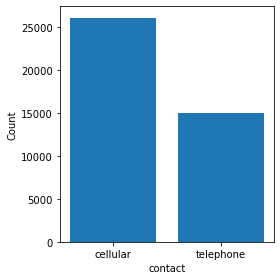

In [32]:
freq_plot('contact', (4, 4))

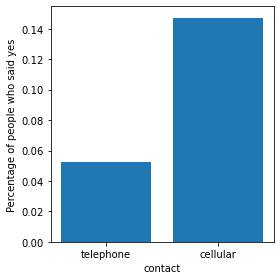

In [33]:
popwsy_plot('contact')

### contact shuld be a very effective variable

## Month variable
### last contact month of year 

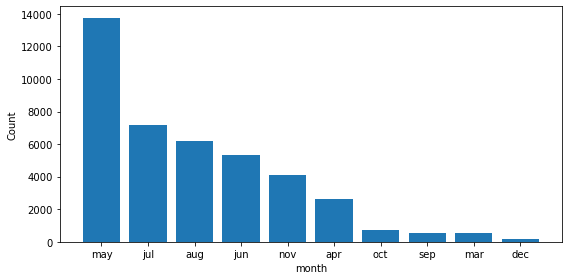

In [34]:
freq_plot('month', (8, 4))

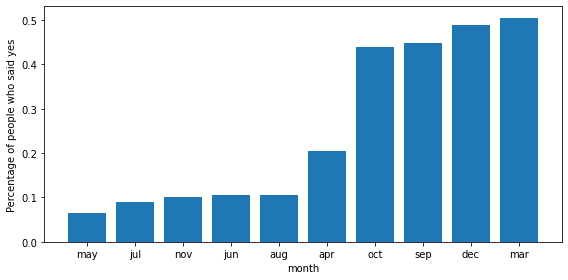

In [35]:
popwsy_plot('month', (8, 4))

### It seem months which has less frequently had a better chance too say yes to camapaign

## Day_of_week
### last contact day of the week 

In [36]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

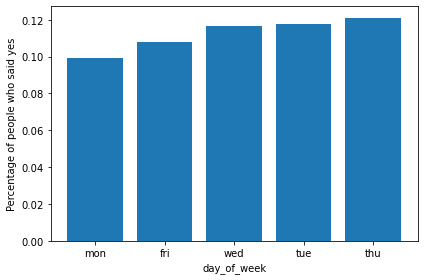

In [37]:
popwsy_plot('day_of_week', (6, 4))

## Campaign variable
### number of contacts performed during this campaign and for this client (numeric, includes last contact)

In [38]:
np.sort(df['campaign'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 37, 39, 40, 41, 42, 43, 56], dtype=int64)

(0.0, 7.0)

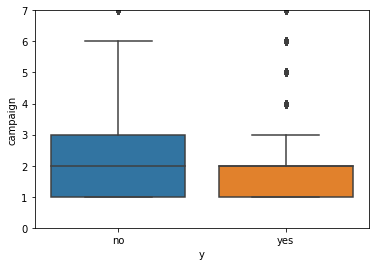

In [39]:
sns.boxplot(df['y'], df['campaign'])
plt.ylim(0, 7)

### opposite of what we think people who did not said yes to campeign had been in more campeingns before

## Pdays variable
### number of days that passed by after the client was last contacted from a previous campaign 

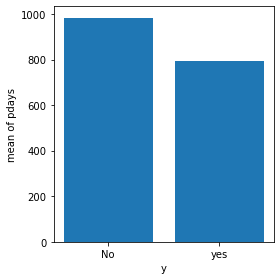

In [40]:
pday_agg= df.groupby('y_1').aggregate([np.mean])

plt.figure(figsize= (4, 4))
plt.bar(range(len(pday_agg)), pday_agg["pdays", "mean"])
plt.xticks(range(len(pday_agg)), ["No", "yes"])
plt.xlabel('y')
plt.ylabel("mean of pdays")
plt.tight_layout()

### mean of pdays of people who said yes is less

## previous variable
### number of contacts performed before this campaign and for this client 

In [41]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [42]:
df.loc[df['previous']== 4, 'previous'] = 4.5
df.loc[df['previous'] == 5, 'previous'] = 4.5
df.loc[df['previous'] == 6, 'previous'] = 4.5
df.loc[df['previous'] == 7, 'previous'] = 4.5

## 	Poutcome variable
### outcome of the previous marketing campaign 

In [43]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

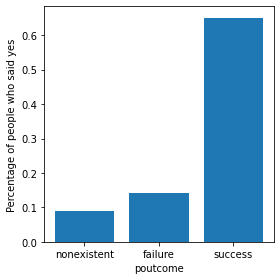

In [44]:
popwsy_plot('poutcome')

### It should be a great predictor, 
### It is cool that probality of say yes too campeign for people who this campeign is their first campeign in this bank is less than people which their last camepign failed.

## Emp.var.rate variable
### employment variation rate - quarterly indicator 

In [45]:
df['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

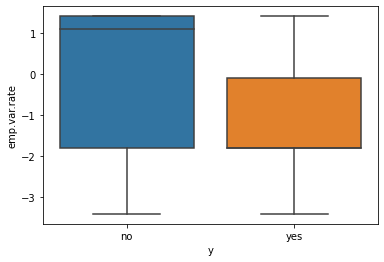

In [46]:
sns.boxplot(df['y'], df['emp.var.rate'])

### people who said yes to the campaign usually has less emp.var.rate

## Cons.price.idx
### consumer price index - monthly indicator 

In [47]:
df['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

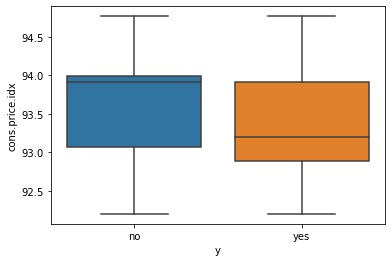

In [48]:
sns.boxplot(df['y'], df['cons.price.idx'])

### So here we can see that median in people who said yes is lower

## Cons.conf.idx 
### consumer confidence index - monthly indicator (numeric)

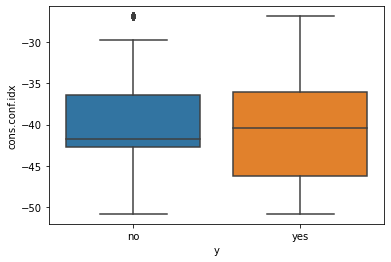

In [49]:
sns.boxplot(df['y'], df['cons.conf.idx'])

### So here we can see that median in people who said yes is upper

## Euribor3m
### euribor 3 month rate - daily indicator (numeric)

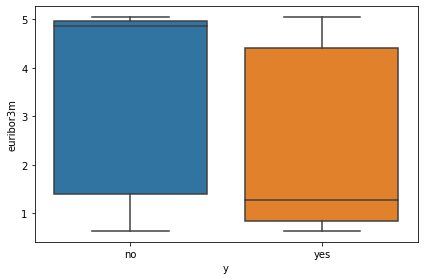

In [50]:
sns.boxplot(df['y'], df['euribor3m'])
plt.tight_layout()

### So here we can see that median in people who said yes is very lower so it should be a very good predictor

## Nr.employed
### number of employees - quarterly indicator (numeric)

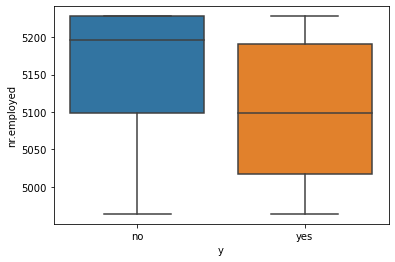

In [51]:
sns.boxplot(df['y'], df['nr.employed'])

## Heat Map: Visualizing Correlation

In [52]:
df_numeric= df[['previous', 'pdays', 'nr.employed', 'euribor3m', 'emp.var.rate', 
    'cons.price.idx', 'cons.conf.idx', 'campaign', 'age']]

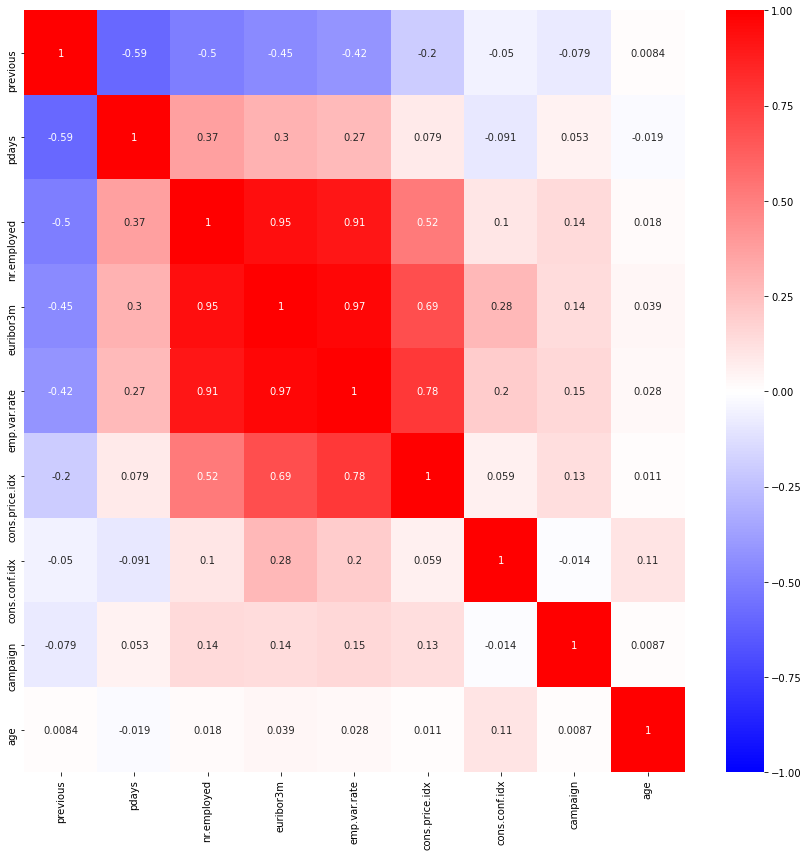

In [53]:
plt.figure(figsize= (12, 12))
sns.heatmap(df_numeric.corr(), annot = True, vmin=-1, vmax=1, center= 0, 
           cmap= 'bwr')
plt.tight_layout()

## Variables with high correlation are very bad and we should do some thing about them
## according to heat map 3 variables: Nr.employed, Euribor3m, Emp.var.rate two by two has more than .90 correlation 
### We can choose one of them and remove the rest, according to plots we choosed Nr.employed

# now we drop columns that seems useless or we made them dummy:


In [54]:
#df.drop(columns=['loan','poutcome', 'contact', 'month',
#                 'day_of_week', 'euribor3m', 'emp.var.rate', 'y_1'], inplace= True)


In [55]:
df.drop(columns=['y_1', 'duration'], inplace= True)

### We removed duration variable because: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [56]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,72,housemaid,married,basic.4y,default-no,no,no,telephone,may,mon,1,999,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,72,services,married,high.school,unknown-yes,no,no,telephone,may,mon,1,999,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,services,married,high.school,default-no,yes,no,telephone,may,mon,1,999,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,default-no,no,no,telephone,may,mon,1,999,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,72,services,married,high.school,default-no,no,yes,telephone,may,mon,1,999,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Y variable

In [57]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

# Split data to train and test set

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [59]:
X = df.drop(columns= 'y')
y = df['y']

In [60]:
print(X.shape)
y.shape

(41188, 19)


(41188,)

In [61]:
X_trainval, X_test, y_trainval, y_test= train_test_split(X, y== 'yes', stratify= y, random_state=42)

## So Our Naive Benchmark Is:

In [62]:
(df[df['y']== 'no'].shape[0])/df.shape[0]

0.8873458288821987

### It is accuracy when we consider all out comes as no it seem nice too us but here our Recall for 'yes' would be 0 that is too bad. and We know that predicting people who would say yes is more important

# Some Preprocessing

In [63]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [64]:
is_cat= X.dtypes== object
categories= is_cat[is_cat==True].index
numerics= is_cat[is_cat==False].index
print(categories)
print(numerics)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')
Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [65]:
categorical_preprocess= Pipeline([
    ('one-hot', OneHotEncoder(handle_unknown= 'ignore'))
])
numerical_preprocess= Pipeline([
#    ('power', PowerTransformer(method= 'box-cox')),
    ('scaler', StandardScaler())
])

In [66]:
preprocess= ColumnTransformer([
    ('num', numerical_preprocess, numerics),
    ('cat', categorical_preprocess, categories)
])

In [67]:
preprocess_tree= ColumnTransformer([
    ('num', 'passthrough', numerics),
    ('cat', categorical_preprocess, categories)
])

# Some predictive Models:

In [68]:
from sklearn.model_selection import GridSearchCV

## 1: KNN

# Logestic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
pipe_Logistic= Pipeline([
    ('prep', preprocess),
    ('model', LogisticRegression())
])

In [72]:
params= {'model__C': np.logspace(-1, 2, 35),
         'prep__num__scaler':[StandardScaler(), MinMaxScaler()]
        }

In [73]:

grid_Logistic= GridSearchCV(pipe_Logistic, param_grid= params,
                            scoring={'AP': "average_precision", "ac": "accuracy"},
                            refit= "AP", verbose= 1, n_jobs= 7,
                            return_train_score= True, cv= 5)


In [74]:
grid_Logistic.fit(X_trainval, y_trainval)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   11.7s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   50.4s
[Parallel(n_jobs=7)]: Done 350 out of 350 | elapsed:  1.6min finished
F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          StandardScaler(copy=True,
                                                                                                         with_mean=True,
                                                

In [75]:
grid_Logistic.best_params_

{'model__C': 24.11864699640997,
 'prep__num__scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [76]:
grid_Logistic.best_score_

0.4448480891432943

In [77]:
model_logistic= grid_Logistic.best_estimator_

In [78]:
Logistic_df= pd.DataFrame(grid_Logistic.cv_results_)
Logistic_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_prep__num__scaler,params,split0_test_AP,split1_test_AP,split2_test_AP,...,mean_test_ac,std_test_ac,rank_test_ac,split0_train_ac,split1_train_ac,split2_train_ac,split3_train_ac,split4_train_ac,mean_train_ac,std_train_ac
0,1.448225,0.033677,0.100273,0.005952,0.1,"StandardScaler(copy=True, with_mean=True, with...","{'model__C': 0.1, 'prep__num__scaler': Standar...",0.423314,0.459303,0.446829,...,0.899550,0.001065,1,0.900656,0.899446,0.900741,0.899850,0.900093,0.900157,0.000489
1,1.034734,0.127446,0.128091,0.018442,0.1,"MinMaxScaler(copy=True, feature_range=(0, 1))","{'model__C': 0.1, 'prep__num__scaler': MinMaxS...",0.418667,0.453154,0.442599,...,0.899032,0.001068,52,0.900332,0.899122,0.900214,0.899446,0.899405,0.899704,0.000479
2,1.338749,0.043839,0.108476,0.006948,0.122528,"StandardScaler(copy=True, with_mean=True, with...","{'model__C': 0.12252798573828648, 'prep__num__...",0.423432,0.459285,0.446736,...,0.899421,0.000808,3,0.900494,0.899405,0.900741,0.899769,0.900174,0.900117,0.000482
3,1.048342,0.084090,0.128091,0.018518,0.122528,"MinMaxScaler(copy=True, feature_range=(0, 1))","{'model__C': 0.12252798573828648, 'prep__num__...",0.418779,0.453529,0.442714,...,0.899064,0.001347,38,0.900291,0.899203,0.900255,0.899567,0.899365,0.899736,0.000454
4,1.260093,0.034534,0.122886,0.013799,0.150131,"StandardScaler(copy=True, with_mean=True, with...","{'model__C': 0.15013107289081734, 'prep__num__...",0.423669,0.459180,0.446432,...,0.899323,0.000920,6,0.900534,0.899527,0.900619,0.899729,0.900174,0.900117,0.000431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1.285712,0.087227,0.133493,0.015832,66.6085,"MinMaxScaler(copy=True, feature_range=(0, 1))","{'model__C': 66.60846290809161, 'prep__num__sc...",0.424232,0.459500,0.443946,...,0.898935,0.001407,67,0.900210,0.899607,0.899850,0.899405,0.900417,0.899898,0.000373
66,1.266696,0.033331,0.116883,0.010016,81.614,"StandardScaler(copy=True, with_mean=True, with...","{'model__C': 81.61400793251835, 'prep__num__sc...",0.424350,0.460201,0.444606,...,0.899032,0.001453,43,0.900170,0.899891,0.900255,0.899243,0.900417,0.899995,0.000413
67,1.293115,0.040076,0.122688,0.010696,81.614,"MinMaxScaler(copy=True, feature_range=(0, 1))","{'model__C': 81.61400793251835, 'prep__num__sc...",0.424130,0.460029,0.444212,...,0.898967,0.001239,62,0.900210,0.899567,0.900134,0.899486,0.900417,0.899963,0.000369
68,1.307925,0.075207,0.118885,0.021015,100,"StandardScaler(copy=True, with_mean=True, with...","{'model__C': 100.0, 'prep__num__scaler': Stand...",0.424300,0.460185,0.444493,...,0.899000,0.001423,55,0.900210,0.899850,0.900174,0.899365,0.900376,0.899995,0.000358


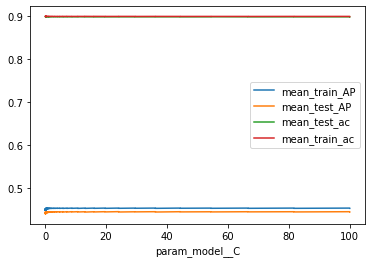

In [79]:
a= Logistic_df.plot("param_model__C", "mean_train_AP")
b= Logistic_df.plot("param_model__C", "mean_test_AP", ax= plt.gca())
c= Logistic_df.plot("param_model__C", "mean_test_ac", ax= plt.gca())
d= Logistic_df.plot("param_model__C", "mean_train_ac", ax= plt.gca())

In [80]:
log_coef= model_logistic.named_steps['model'].coef_
log_coef[0]

array([ 1.02881500e-03, -1.22963083e-01, -2.24455010e-01, -4.20014945e-02,
       -2.32666664e+00,  1.21208305e+00,  1.26817995e-01,  3.49701911e-01,
        5.06629039e-01, -5.32970763e-02, -1.67405820e-01, -1.03037078e-01,
       -1.17496004e-01, -1.02536763e-01,  2.59015602e-01, -1.05588368e-01,
       -1.63271373e-01,  9.94914643e-02, -5.29054398e-02, -5.89096336e-02,
       -1.25843983e-02, -2.52715782e-01, -2.00843890e-01, -1.24965214e-01,
       -1.95879823e-01, -5.39183324e-02, -2.55968688e-01, -1.62020288e-01,
        4.93980878e-01, -2.20613419e-01, -9.38633715e-02, -9.02418433e-02,
       -1.71672850e-01, -4.06852036e-01, -1.78159191e-01, -1.70318026e-01,
       -2.30047669e-01, -2.09759709e-01, -1.70318026e-01, -1.98447151e-01,
        7.02728280e-02, -6.48797714e-01, -2.11976727e-01,  2.91073053e-01,
        3.38794762e-01, -1.31359334e-01, -8.83441832e-01,  1.30765617e+00,
       -6.08452914e-01, -6.29090839e-01, -1.40746353e-01,  8.90191268e-02,
       -1.21405093e-01, -

In [81]:
ohe= model_logistic.named_steps['prep'].named_transformers_['cat'].named_steps['one-hot']
feature_cats= ohe.get_feature_names(input_features= categories)
feature_cats

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_default-no', 'default_unknown-yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_failure', 'poutco

In [82]:
feature_names= np.r_[numerics, feature_cats]
feature_names

array(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_default-no', 'default_unknown-yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'da

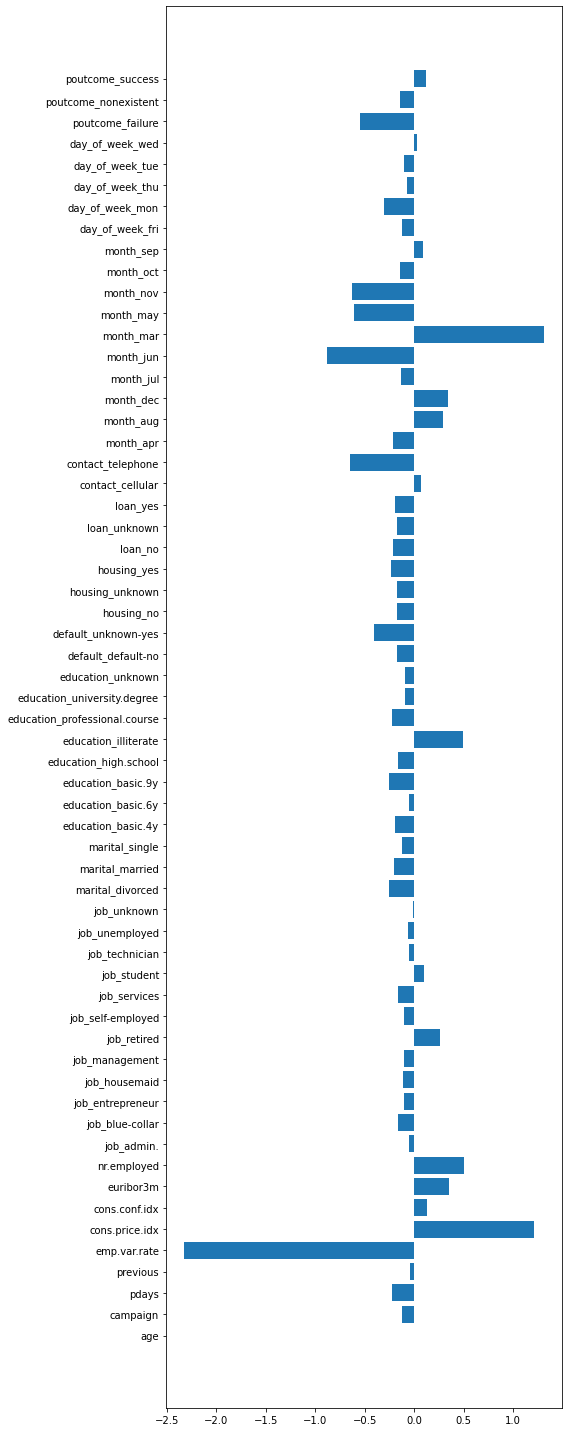

In [81]:
plt.figure(figsize= (8, 20))
plt.barh(range(len(feature_names)), log_coef[0])
plt.yticks(range(len(feature_names)), feature_names)
plt.tight_layout()

# Decision Tree

## Post- Pruning Tree

In [216]:
pipe_post_pruning= Pipeline([
    ('prep', preprocess_tree),
    ('model', DecisionTreeClassifier(random_state= 22))
])

In [219]:
pipe_post_pruning.named_steps['model']

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='best')

In [266]:

params= {
    'model__ccp_alpha': np.linspace(0.0001, 0.0004, 10)
}

In [267]:
grid_tree2= GridSearchCV(pipe_post_pruning, param_grid= params, scoring= {'AP': 'average_precision', 'ac': 'accuracy'}, 
                       refit= 'AP', verbose= 1, return_train_score= True, cv= 5)

In [268]:
grid_tree2.fit(X_trainval, y_trainval)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         'passthrough',
                                                                         Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                                        ('cat',...
                                                               presort='deprec

In [269]:
grid_tree2.best_score_

0.41899544617140344

In [270]:
grid_tree2.best_params_

{'model__ccp_alpha': 0.0001666666666666667}

In [271]:
model_tree2= grid_tree2.best_estimator_

In [272]:
tree2_df= pd.DataFrame(grid_tree2.cv_results_)
tree2_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__ccp_alpha,params,split0_test_AP,split1_test_AP,split2_test_AP,split3_test_AP,...,mean_test_ac,std_test_ac,rank_test_ac,split0_train_ac,split1_train_ac,split2_train_ac,split3_train_ac,split4_train_ac,mean_train_ac,std_train_ac
0,0.342248,0.016383,0.045838,0.000401,0.0001,{'model__ccp_alpha': 0.0001},0.392656,0.423454,0.417735,0.411893,...,0.898708,0.001077,10,0.910772,0.907943,0.907943,0.908995,0.909845,0.909100,0.001099
1,0.335647,0.005209,0.045833,0.000755,0.000133333,{'model__ccp_alpha': 0.00013333333333333334},0.400779,0.428826,0.420526,0.419169,...,0.899809,0.001020,8,0.905188,0.904059,0.905030,0.905475,0.904099,0.904770,0.000582
2,0.338246,0.005909,0.046037,0.000634,0.000166667,{'model__ccp_alpha': 0.0001666666666666667},0.402632,0.428724,0.425552,0.429596,...,0.899097,0.001200,9,0.904298,0.902359,0.903573,0.902642,0.902804,0.903135,0.000707
3,0.335237,0.006065,0.046033,0.000634,0.0002,{'model__ccp_alpha': 0.0002},0.404523,0.428568,0.417681,0.416600,...,0.900100,0.001472,7,0.903245,0.901347,0.902764,0.902602,0.902238,0.902439,0.000635
4,0.334840,0.004726,0.046238,0.000395,0.000233333,{'model__ccp_alpha': 0.00023333333333333333},0.397454,0.427506,0.411331,0.420160,...,0.900295,0.001594,4,0.902922,0.901347,0.902521,0.901064,0.902238,0.902018,0.000704


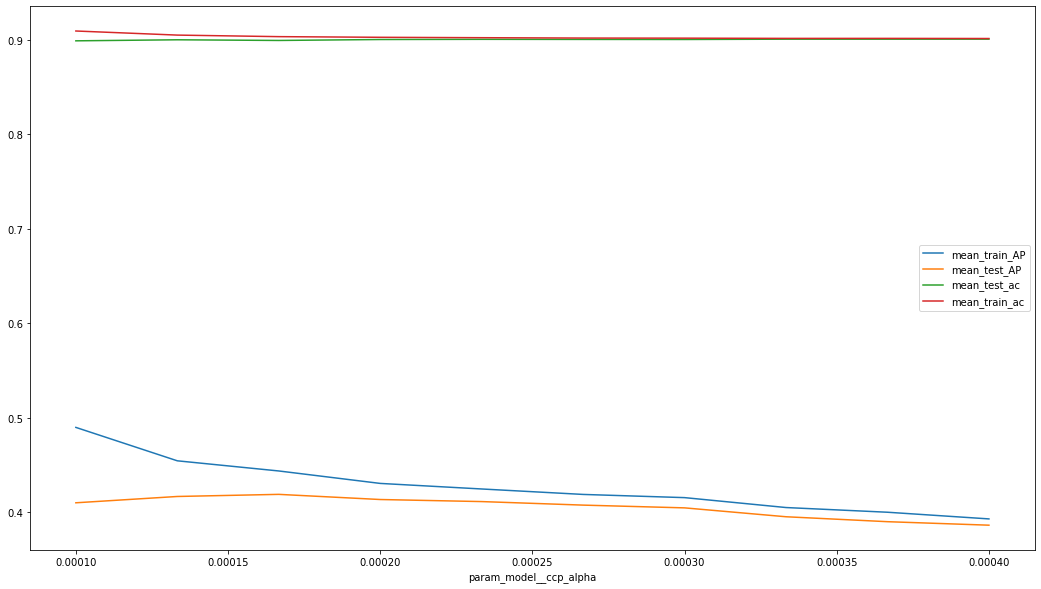

In [273]:
plt.rcParams["figure.figsize"] = [10, 5]
a= tree2_df.plot("param_model__ccp_alpha", "mean_train_AP")
b= tree2_df.plot("param_model__ccp_alpha", "mean_test_AP", ax= plt.gca())
c= tree2_df.plot("param_model__ccp_alpha", "mean_test_ac", ax= plt.gca())
d= tree2_df.plot("param_model__ccp_alpha", "mean_train_ac", ax= plt.gca())

In [274]:
#https://pythonprogramminglanguage.com/decision-tree-visual-example/
# Visualize data


dot_data = export_graphviz(model_tree2.named_steps['model'],
                                feature_names= feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree22.png')

True

![](tree22.png)

# Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
pipe_RF= Pipeline([
    ('prep', preprocess_tree),
    ('model', RandomForestClassifier(random_state= 65, n_estimators= 350))
])

In [110]:
np.arange(3, 10, 2)

array([3, 5, 7, 9])

In [158]:
params= {
    'model__max_features': [6, 7, 8],
    'model__max_depth': [4, 5, 6]
}

In [159]:
grid_RF= GridSearchCV(pipe_RF, param_grid= params, scoring= {'AP': 'average_precision', 'ac': 'accuracy'}, 
                       refit= 'AP', verbose= 1, return_train_score= True, cv= 5)

In [160]:
grid_RF.fit(X_trainval, y_trainval)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 10.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         'passthrough',
                                                                         Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                                        ('cat',...
                                                               min_weight_frac

In [161]:
grid_RF.best_params_

{'model__max_depth': 6, 'model__max_features': 8}

In [162]:
grid_RF.best_score_

0.45623601280936976

In [169]:
model_RF= grid_RF.best_estimator_

In [166]:
RF_df= pd.DataFrame(grid_RF.cv_results_)
RF_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_features,params,split0_test_AP,split1_test_AP,split2_test_AP,...,mean_test_ac,std_test_ac,rank_test_ac,split0_train_ac,split1_train_ac,split2_train_ac,split3_train_ac,split4_train_ac,mean_train_ac,std_train_ac
0,7.168458,0.040864,0.875027,0.016688,4,6,"{'model__max_depth': 4, 'model__max_features': 6}",0.427337,0.450674,0.447113,...,0.898255,0.001730,9,0.899199,0.898394,0.899203,0.898636,0.898515,0.898789,0.000345
1,7.667616,0.058840,0.860416,0.008457,4,7,"{'model__max_depth': 4, 'model__max_features': 7}",0.430125,0.451898,0.453484,...,0.898482,0.001910,8,0.899118,0.898515,0.899324,0.898555,0.898474,0.898797,0.000353
2,8.358106,0.250266,0.889635,0.055826,4,8,"{'model__max_depth': 4, 'model__max_features': 8}",0.430809,0.453589,0.454764,...,0.898708,0.001849,4,0.899522,0.898515,0.899648,0.898960,0.898920,0.899113,0.000418
3,8.017470,0.054576,0.917451,0.002929,5,6,"{'model__max_depth': 5, 'model__max_features': 6}",0.432498,0.455671,0.459623,...,0.898514,0.001689,7,0.899765,0.899243,0.900053,0.899446,0.899567,0.899615,0.000277
4,9.350608,0.656908,1.064351,0.176446,5,7,"{'model__max_depth': 5, 'model__max_features': 7}",0.433200,0.460978,0.461702,...,0.898644,0.001652,6,0.900251,0.899081,0.899850,0.900053,0.899446,0.899736,0.000422


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text major ticklabel objects>)

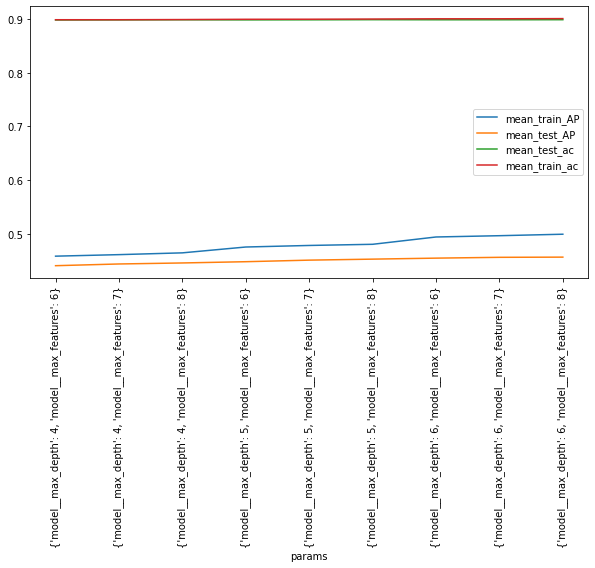

In [165]:
plt.rcParams["figure.figsize"] = [10, 5]
a= RF_df.plot("params", "mean_train_AP")
b= RF_df.plot("params", "mean_test_AP", ax= plt.gca())
c= RF_df.plot("params", "mean_test_ac", ax= plt.gca())
d= RF_df.plot("params", "mean_train_ac", ax= plt.gca())
plt.xticks(rotation= 90)

In [181]:
RF_coef= model_RF.named_steps['model'].feature_importances_

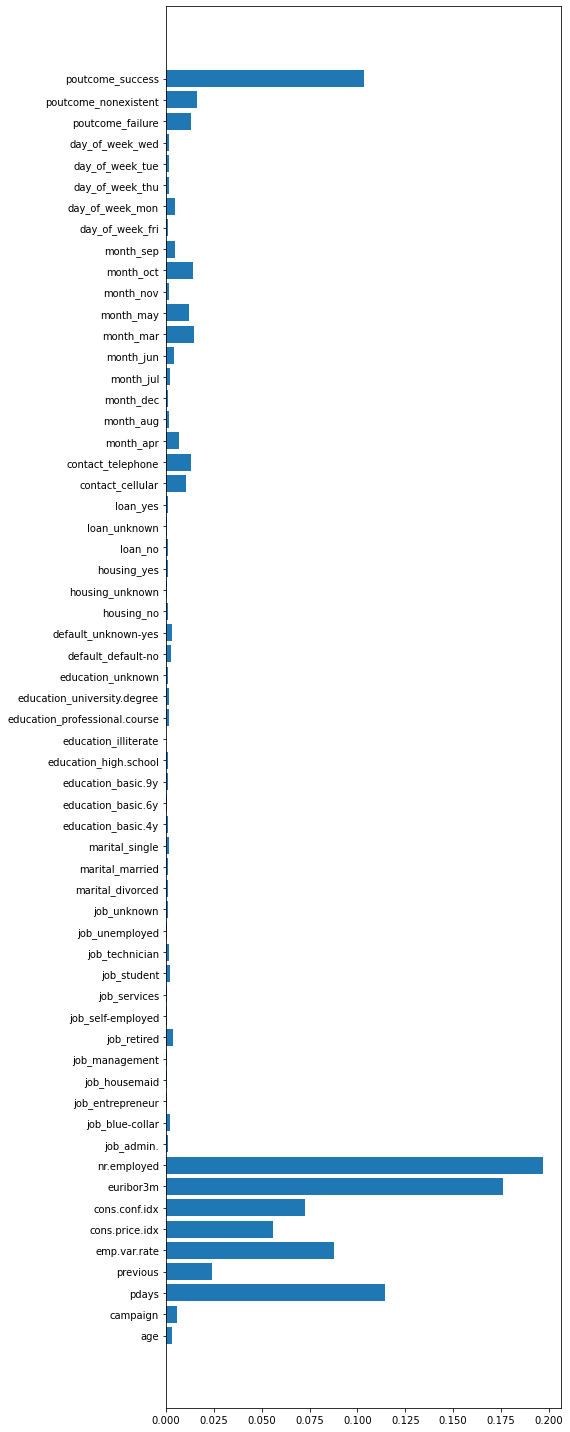

In [183]:
plt.figure(figsize= [8, 20])
plt.barh(range(len(RF_coef)), RF_coef)
plt.yticks(range(len(RF_coef)), feature_names)



plt.tight_layout()

# XGboost

In [89]:
from xgboost import XGBClassifier

In [90]:
pipe_xgb= Pipeline([
    ('prep', preprocess_tree),
    ('model', XGBClassifier(max_depth= 2, n_estimators= 800))
])

In [91]:
np.logspace(-2, 0, 10)

array([0.01      , 0.01668101, 0.02782559, 0.04641589, 0.07742637,
       0.12915497, 0.21544347, 0.35938137, 0.59948425, 1.        ])

In [102]:
params= {'model__learning_rate': np.linspace(0.01, 0.05, 10)
         }


In [103]:
grid_xgb= GridSearchCV(pipe_xgb, param_grid= params, return_train_score= True,
                       scoring={'AP': "average_precision", 'ac': "accuracy"},cv= 5,
                        refit= "AP", verbose= 1, n_jobs= 7)

In [104]:
grid_xgb.fit(X_trainval, y_trainval)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  3.6min
[Parallel(n_jobs=7)]: Done  50 out of  50 | elapsed:  4.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         'passthrough',
                                                                         Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                                        ('cat',...
                                                      seed=None, silent=None,


In [105]:
grid_xgb.best_params_

{'model__learning_rate': 0.05}

In [106]:
grid_xgb.best_score_

0.4623547940346445

In [107]:
model_xgb= grid_xgb.best_estimator_

In [108]:
pd.DataFrame(grid_xgb.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,params,split0_test_AP,split1_test_AP,split2_test_AP,split3_test_AP,...,mean_test_ac,std_test_ac,rank_test_ac,split0_train_ac,split1_train_ac,split2_train_ac,split3_train_ac,split4_train_ac,mean_train_ac,std_train_ac
0,33.961233,0.453749,0.457724,0.023448,0.01,{'model__learning_rate': 0.01},0.427441,0.469333,0.458083,0.464713,...,0.899259,0.001962,9,0.900453,0.899324,0.900417,0.899769,0.900174,0.900028,0.000428
1,33.931213,0.107161,0.439312,0.021190,0.0144444,{'model__learning_rate': 0.014444444444444444},0.426937,0.471923,0.460491,0.466897,...,0.899065,0.002037,10,0.901343,0.899810,0.900457,0.900093,0.900457,0.900432,0.000517
2,34.059703,0.325162,0.466731,0.020737,0.0188889,{'model__learning_rate': 0.01888888888888889},0.430565,0.474803,0.462980,0.470076,...,0.899388,0.001714,8,0.902234,0.900255,0.901186,0.900943,0.901752,0.901274,0.000679
3,34.069311,0.159552,0.524171,0.022558,0.0233333,{'model__learning_rate': 0.02333333333333333},0.433738,0.477207,0.465627,0.470799,...,0.899971,0.001826,5,0.903286,0.901428,0.901671,0.902076,0.902561,0.902205,0.000663
4,33.866366,0.245819,0.485744,0.034582,0.0277778,{'model__learning_rate': 0.027777777777777776},0.434937,0.476910,0.465986,0.469652,...,0.899777,0.001694,7,0.903286,0.902319,0.902035,0.902642,0.902845,0.902625,0.000431


In [109]:
xgb_df= pd.DataFrame(grid_xgb.cv_results_)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 7 Text major ticklabel objects>)

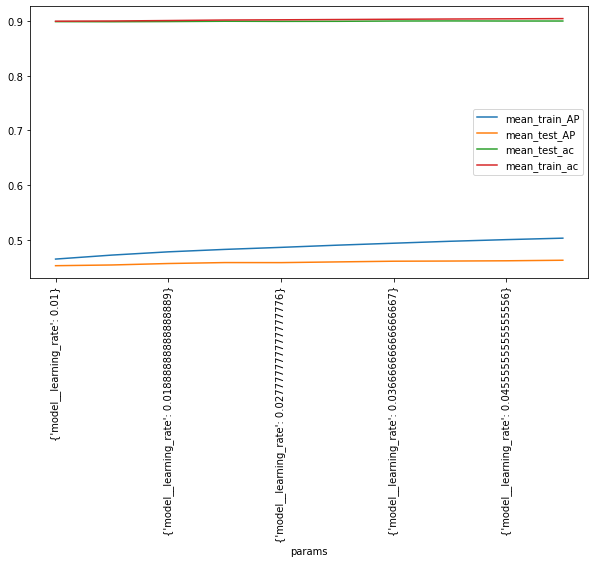

In [110]:
plt.rcParams["figure.figsize"] = [10, 5]
a= xgb_df.plot("params", "mean_train_AP")
b= xgb_df.plot("params", "mean_test_AP", ax= plt.gca())
c= xgb_df.plot("params", "mean_test_ac", ax= plt.gca())
d= xgb_df.plot("params", "mean_train_ac", ax= plt.gca())
plt.xticks(rotation= 90)

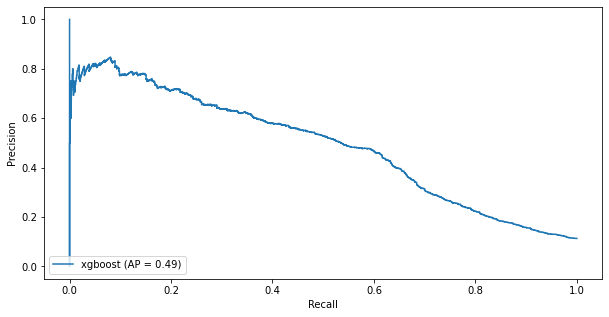

In [112]:
prc_xgb= plot_precision_recall_curve(model_xgb, X_test, y_test, name= 'xgboost')

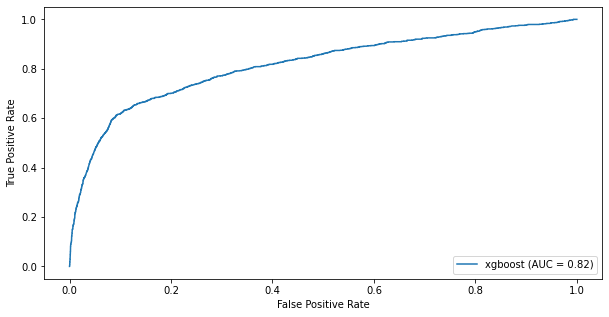

In [114]:
roc_xgb= plot_roc_curve(model_xgb, X_test, y_test, name= 'xgboost')

So the best model based on average-precision score is xgboost and now we we will find the best threshold so that our macro average is maximum

In [147]:
y_predsss= model_xgb.predict_proba(X_trainval)[:, 1]>0.05
X_trainval
recall_score(y_trainval, y_predss, average= 'macro')

0.6233480864088039

In [148]:
macroavg_recal= []
for i in np.arange(0, 0.6, 0.01):
    y_preds= model_xgb.predict_proba(X_trainval)[:, 1]>i
    res= recall_score(y_trainval, y_preds, average= 'macro')
    macroavg_recal.append(res)

print("Max: %0.4f and Argmax: %i"%(np.max(macroavg_recal), np.argmax(macroavg_recal)))    

Max: 0.7515 and Argmax: 12


In [153]:
y_pred= model_xgb.predict_proba(X_test)[:, 1]> 0.12
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.87      0.91      9137
        True       0.39      0.66      0.49      1160

    accuracy                           0.84     10297
   macro avg       0.67      0.76      0.70     10297
weighted avg       0.89      0.84      0.86     10297



(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xfa35208e48>)

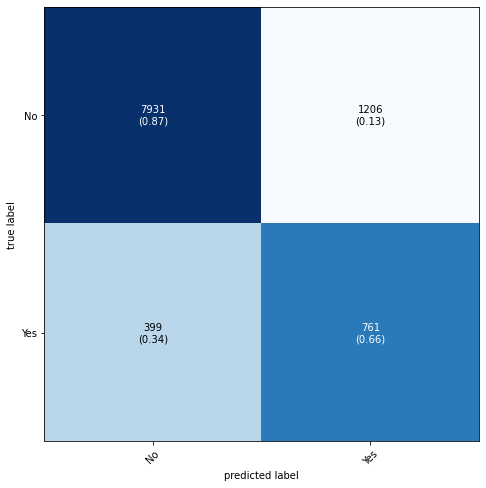

In [155]:
matrix= confusion_matrix(y_test, y_pred)
class_names= ["No", "Yes"]
ml_plot_confusion_matrix(matrix, figsize= (8, 8), show_normed= True, class_names= class_names)

## Feature importance for the selected model by Permutation_Importance

In [157]:
from sklearn.inspection import permutation_importance

In [158]:
res= permutation_importance(model_xgb, X_test, y_test, n_repeats= 100, n_jobs= 5, random_state=15)
sorted_idx= res.importances_mean.argsort()


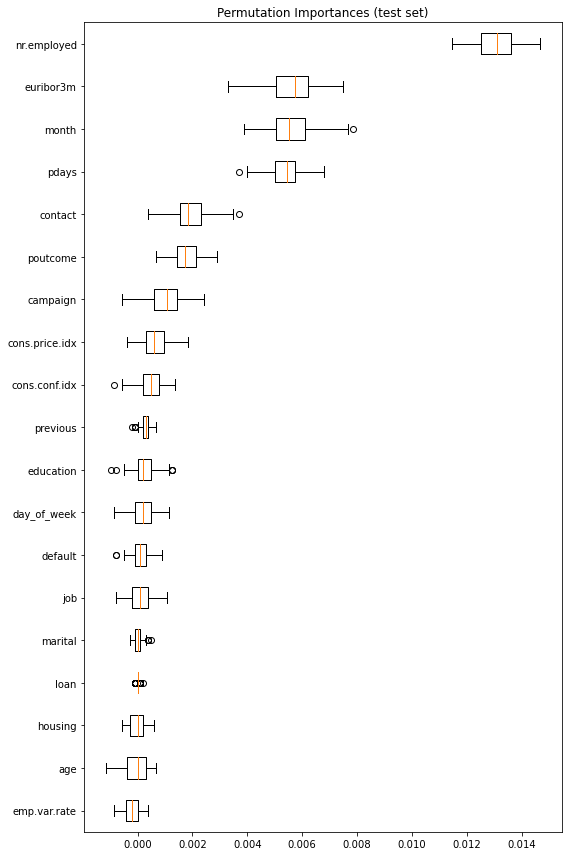

In [160]:
#https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html
fig, ax = plt.subplots(figsize= (8, 12))
ax.boxplot(res.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()